TP réalisé par :

**WELEHELA TAWEUTEU ORCHELLE PATRICIA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import TfidfVectorizer

## *Étape 1 : Créer une collection de 6 documents*

On commence par une petite collection de textes simples :

In [ ]:
documents = [
    "Le chat dort sur le canapé.",
    "Le chien joue dans le jardin.",
    "Les oiseaux chantent le matin.",
    "Le soleil brille et le ciel est bleu.",
    "La pluie tombe sur la ville.",
    "Le vent souffle fort dans les arbres."
]

## *Étape 2 : Prétraitement des textes*

Le prétraitement est essentiel pour normaliser les données. On applique :

**Lowercase** : tout mettre en minuscules.

**Nettoyage** : suppression de la ponctuation.

**Tokenisation** : découper les phrases en mots.

**Stopwords** : retirer les mots vides (ex. "le", "la", "et", "dans").

In [ ]:
# Stopwords en français (liste simplifiée)
stopwords_fr = set([
    "le", "la", "les", "et", "dans", "sur", "de", "du", "des", "un", "une", "au", "aux", "est", "en", "à"
])

def preprocess(doc):
    doc = doc.lower()  # lowercase
    doc = re.sub(r'[^\w\s]', '', doc)  # remove punctuation
    tokens = doc.split()  # tokenize
    tokens = [word for word in tokens if word not in stopwords_fr]  # remove stopwords
    return " ".join(tokens)

documents_clean = [preprocess(doc) for doc in documents]
documents_clean

['chat dort canapé',
 'chien joue jardin',
 'oiseaux chantent matin',
 'soleil brille ciel bleu',
 'pluie tombe ville',
 'vent souffle fort arbres']

## **Étape 3 : Matrice Bag of Words (BoW)**

La méthode Bag of Words crée une matrice où chaque ligne est un document et chaque colonne un mot du vocabulaire. La valeur est le nombre d’occurrences du mot dans le document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(documents_clean)

In [ ]:
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer_bow.get_feature_names_out())
print(df_bow)

   arbres  bleu  brille  canapé  chantent  chat  chien  ciel  dort  fort  \
0       0     0       0       1         0     1      0     0     1     0   
1       0     0       0       0         0     0      1     0     0     0   
2       0     0       0       0         1     0      0     0     0     0   
3       0     1       1       0         0     0      0     1     0     0   
4       0     0       0       0         0     0      0     0     0     0   
5       1     0       0       0         0     0      0     0     0     1   

   jardin  joue  matin  oiseaux  pluie  soleil  souffle  tombe  vent  ville  
0       0     0      0        0      0       0        0      0     0      0  
1       1     1      0        0      0       0        0      0     0      0  
2       0     0      1        1      0       0        0      0     0      0  
3       0     0      0        0      0       1        0      0     0      0  
4       0     0      0        0      1       0        0      1     0      1  

## **Étape 4 : Matrice TF-IDF**

**TF-IDF (Term Frequency - Inverse Document Frequency)** pondère les mots en fonction de leur fréquence dans le document et leur rareté dans la collection. Cela permet de réduire l’importance des mots trop fréquents.

In [ ]:
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(documents_clean)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_tfidf


,arbres,bleu,brille,canapé,chantent,chat,chien,ciel,dort,fort,jardin,joue,matin,oiseaux,pluie,soleil,souffle,tombe,vent,ville
0,0.0,0.0,0.0,0.57735,0.00000,0.57735,0.00000,0.0,0.57735,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.00000
1,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.57735,0.0,0.00000,0.0,0.57735,0.57735,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.00000
2,0.0,0.0,0.0,0.00000,0.57735,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.57735,0.57735,0.00000,0.0,0.0,0.00000,0.0,0.00000
3,0.0,0.5,0.5,0.00000,0.00000,0.00000,0.00000,0.5,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.5,0.0,0.00000,0.0,0.00000
4,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.57735,0.0,0.0,0.57735,0.0,0.57735
5,0.5,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.5,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.5,0.00000,0.5,0.00000


## **Étape 5 : Afficher le vocabulaire extrait**

Le vocabulaire est simplement la liste des mots uniques après prétraitement :

In [ ]:
vocabulaire = vectorizer_bow.get_feature_names_out()
print("Vocabulaire extrait :", vocabulaire)

Vocabulaire extrait : ['arbres' 'bleu' 'brille' 'canapé' 'chantent' 'chat' 'chien' 'ciel' 'dort'
 'fort' 'jardin' 'joue' 'matin' 'oiseaux' 'pluie' 'soleil' 'souffle'
 'tombe' 'vent' 'ville']


## **Étape 6 : Utiliser Word2Vec pour vectoriser les mots**

Word2Vec est un algorithme qui apprend des représentations vectorielles des mots en capturant leurs contextes. Contrairement à BoW ou TF-IDF, il encode des relations sémantiques : les mots proches dans le sens auront des vecteurs proches.

### **1. Préparer les données pour Word2Vec**

Word2Vec attend une liste de phrases tokenisées (liste de listes de mots) :

In [ ]:
!pip install gensim

In [ ]:
#!pip install gensim
from gensim.models import Word2Vec

# Re-tokeniser les documents nettoyés
tokenized_docs = [doc.split() for doc in documents_clean]

### **2. Entraîner le modèle Word2Vec**
On utilise le modèle skip-gram (sg=1) ou CBOW (sg=0). Ici, on choisit CBOW pour sa simplicité :

In [ ]:
model = Word2Vec(sentences=tokenized_docs, vector_size=50, window=2, min_count=1, sg=0)


vector_size=50 : dimension des vecteurs

window=2 : taille du contexte

min_count=1 : inclure tous les mots

sg=0 : CBOW

### **3. Visualiser les vecteurs en 3D**
   
On réduit les vecteurs à 3 dimensions avec PCA (analyse en composantes principales), puis on les affiche avec matplotlib.

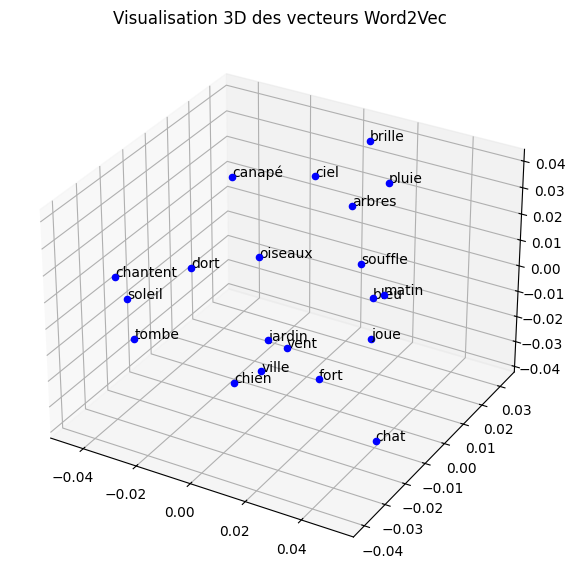

In [ ]:
# Extraire les vecteurs
words = list(model.wv.index_to_key)
word_vectors = [model.wv[word] for word in words]

# Réduction dimensionnelle à 3D
pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(*word_vectors_3d[i], color='blue')
    ax.text(*word_vectors_3d[i], word, fontsize=10)

ax.set_title("Visualisation 3D des vecteurs Word2Vec")
plt.show()

## **Etape 7: Etape Générer les embeddings avec MiniLM**

**MiniLM** est un modèle de type Transformer optimisé pour encoder des phrases en vecteurs denses. Il capture le sens global de la phrase, contrairement à Word2Vec qui encode mot par mot.

In [ ]:
!pip install sentence-transformers

### **1-Encodage des phrases avec MiniLM**

In [ ]:
from sentence_transformers import SentenceTransformer

# Charger le modèle MiniLM
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Nos phrases originales
"""documents = [
    "Le chat dort sur le canapé.",
    "Le chien joue dans le jardin.",
    "Les oiseaux chantent le matin.",
    "Le soleil brille et le ciel est bleu.",
    "La pluie tombe sur la ville.",
    "Le vent souffle fort dans les arbres."
]"""

# Générer les embeddings
embeddings_miniLM = model.encode(documents)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### **2-Réduction dimensionnelle et visualisation 3D**

On utilise PCA pour projeter les vecteurs dans un espace 3D :

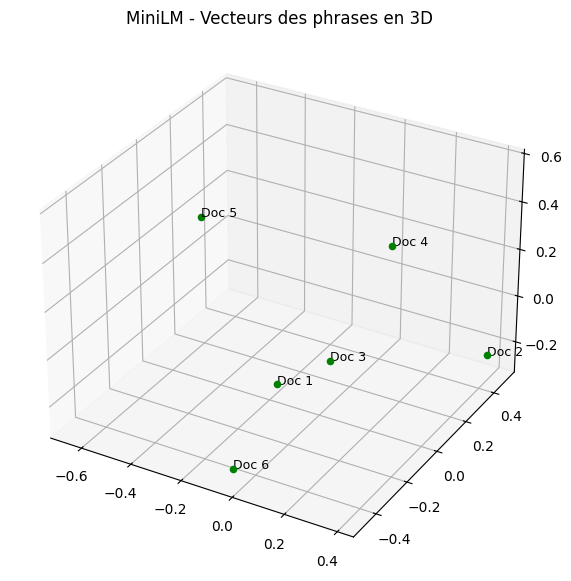

In [ ]:
# PCA en 3D
embeddings_3d = PCA(n_components=3).fit_transform(embeddings_miniLM)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, sentence in enumerate(documents):
    ax.scatter(*embeddings_3d[i], color='green')
    ax.text(*embeddings_3d[i], f"Doc {i+1}", fontsize=9)
ax.set_title("MiniLM - Vecteurs des phrases en 3D")
plt.show()
